In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn as sklearn
from sklearn import decomposition,cluster
import re
import statsmodels.api as sm

In [57]:
df1 = pd.read_csv("Complete_Data.csv")
df1 = df1.set_index('Pays_indic')

In [58]:
code_list = []
for i in df1['Country Code']:
    if i not in code_list : 
        code_list.append(i)
code_list.pop(-1)

dic = {}
dic['pib'] = '_GDP (current US$)'
dic['pib_hab'] = '_GDP (current US$) par Tete'
dic['pib_growth'] = '_GDP growth (annual %)'
dic['pib_hab_growth'] = '_Croissance_GDP (current US$) par Tete (pourcent)'
dic['pop'] = '_Population, total'
dic['ges'] = '_Émissions totales de GES (kt d’équivalent CO2)'
dic['ges_growth'] = '_Croissance_Émissions totales de GES (kt d’équivalent CO2) (pourcent)	'
dic['ges_hab'] = '_Émissions totales de GES (kt d’équivalent CO2) par Tete'
dic['ges_hab_growth'] = '_Croissance_Émissions totales de GES (kt d’équivalent CO2) par Tete (pourcent)'
dic['industry'] = '_Industry (including construction), value added (% of GDP)'
dic['agr'] = '_Agriculture, forestry, and fishing, value added (% of GDP)'
dic['clean_nrj'] = '_Alternative and nuclear energy (% of total energy use)'
dic['nrj_hab'] = '_Energy use (kg of oil equivalent per capita)'
dic['nrj_hab_growth'] = '_Croissance_Energy use (kg of oil equivalent per capita) (pourcent)'

In [59]:
def regress (country_code, regresseur, regresse) :
    
    if country_code + regresse in df1.index and country_code + regresseur in df1.index :
        interm= pd.DataFrame(df1.loc[[country_code + regresse, country_code + regresseur]]).drop(['Country Name',
        'Country Code','Indicator Name'],axis =1).dropna(axis = 1)

        if interm.shape != (2,0): 
            x = sm.add_constant(interm.loc[country_code + regresseur].to_numpy())
            y = interm.loc[country_code + regresse].to_numpy()

            model = sm.OLS(y,x,'drop')
            results = model.fit()

            r2 = results.rsquared
            coef = results.params[1]

            return coef, r2
    
    else : return
    
def get_coeff (regresse, regresseur) :    
    dico = {}
    for code in code_list:
        dico[code] = regress(code, regresse, regresseur)
        if dico[code] == None:
            dico.pop(code)

    regress_df = pd.DataFrame(dico.values(), dico.keys(), ['Coefficient de ' + regresse + ' sur ' + regresseur,
                                                         'R2 de ' + regresse + ' sur ' + regresseur])
    return regress_df


def get_2000(var):
    dic = {}
    
    for country_code in code_list : 
        if country_code + var in df1.index :
            dic[country_code] = df1.loc[country_code + var][23]
    
    temp_df = pd.DataFrame(dic.values(), dic.keys(), ['2000' + var])
    
    return(temp_df)

def get_average_growth_rate(var) :
    dic = {}
    
    for country_code in code_list : 
        if country_code + var in df1.index :    
            values = list(df1.loc[country_code + var][3:])
            values = [x for x in values if ~np.isnan(x)]
            initial_value = values[0]
            final_value = values[len(values)-1]
            variation_rate = (100 * ((final_value / initial_value))**(1/(len(values)-1))) - 100
            if variation_rate != np.inf :
                dic[country_code] = variation_rate
    
    temp_df = pd.DataFrame(dic.values(), dic.keys(), ['Average Growth Rate' + var])
    
    return(temp_df)

In [46]:
data = get_average_growth_rate(dic['pib_hab'])

data_list = [get_average_growth_rate(dic['agr']), get_average_growth_rate(dic['industry']), 
            get_average_growth_rate(dic['ges_hab']), get_average_growth_rate(dic['clean_nrj']),
            get_average_growth_rate(dic['nrj_hab']), 
            get_2000(dic['pib_hab']), get_2000(dic['agr']), get_2000(dic['industry']),
            get_2000(dic['ges_hab']), get_2000(dic['clean_nrj']), get_2000(dic['nrj_hab']), 
            get_coeff(dic['pib_hab'], dic['ges_hab']),
            get_coeff(dic['pib_hab'], dic['nrj_hab'])]
for i in data_list :
    data = data.merge(i, how = 'outer', left_index = True, right_index = True)


<ipython-input-45-4bd91c805f1f>:53: RuntimeWarning: divide by zero encountered in double_scalars
  variation_rate = (100 * ((final_value / initial_value))**(1/(len(values)-1))) - 100
<ipython-input-45-4bd91c805f1f>:53: RuntimeWarning: invalid value encountered in double_scalars
  variation_rate = (100 * ((final_value / initial_value))**(1/(len(values)-1))) - 100


In [47]:
data.head(1)

,Average Growth Rate_GDP (current US$) par Tete,"Average Growth Rate_Agriculture, forestry, and fishing, value added (% of GDP)","Average Growth Rate_Industry (including construction), value added (% of GDP)",Average Growth Rate_Émissions totales de GES (kt d’équivalent CO2) par Tete,Average Growth Rate_Alternative and nuclear energy (% of total energy use),Average Growth Rate_Energy use (kg of oil equivalent per capita),2000_GDP (current US$) par Tete,"2000_Agriculture, forestry, and fishing, value added (% of GDP)","2000_Industry (including construction), value added (% of GDP)",2000_Émissions totales de GES (kt d’équivalent CO2) par Tete,2000_Alternative and nuclear energy (% of total energy use),2000_Energy use (kg of oil equivalent per capita),Coefficient de _GDP (current US$) par Tete sur _Émissions totales de GES (kt d’équivalent CO2) par Tete,R2 de _GDP (current US$) par Tete sur _Émissions totales de GES (kt d’équivalent CO2) par Tete,Coefficient de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Émissions totales de GES (kt d’équivalent CO2) par Tete (pourcent),R2 de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Émissions totales de GES (kt d’équivalent CO2) par Tete (pourcent),Coefficient de _GDP (current US$) par Tete sur _Energy use (kg of oil equivalent per capita),R2 de _GDP (current US$) par Tete sur _Energy use (kg of oil equivalent per capita),Coefficient de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Energy use (kg of oil equivalent per capita) (pourcent),R2 de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Energy use (kg of oil equivalent per capita) (pourcent)
AGO,3.737056,NaN,NaN,-3.812102,2.444285,-0.013122,556.836318,NaN,NaN,0.002121,0.873405,438.550019,-5.078478e-07,0.310325,0.019271,0.000805,0.011929,0.322442,0.016749,0.015663


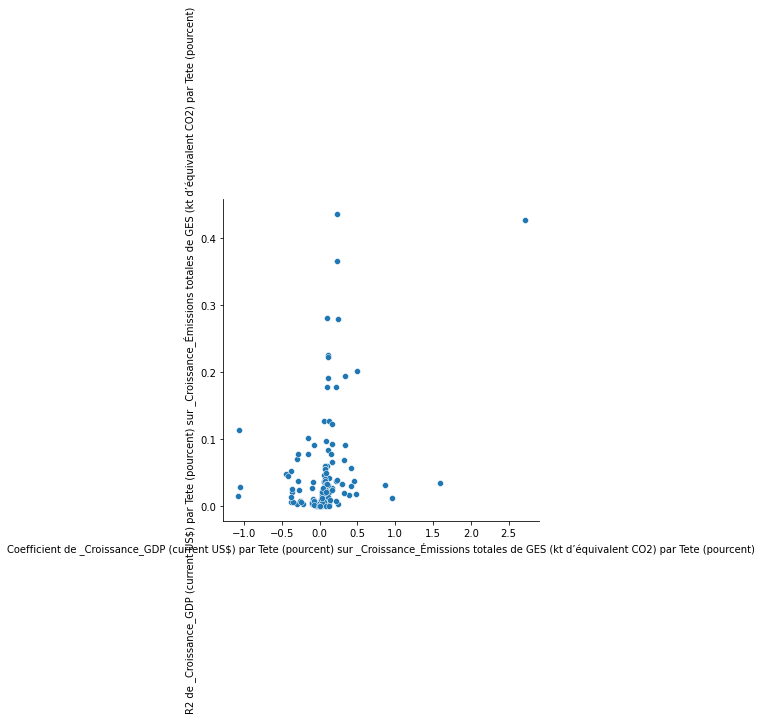

In [48]:
sns.relplot(data = data, x= 'Coefficient de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Émissions totales de GES (kt d’équivalent CO2) par Tete (pourcent)',
            y = 'R2 de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Émissions totales de GES (kt d’équivalent CO2) par Tete (pourcent)')

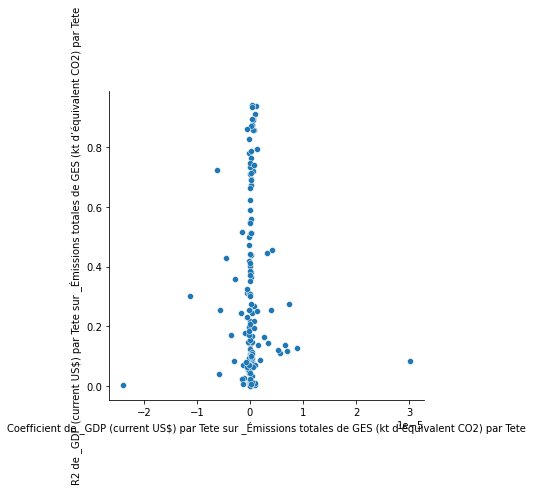

In [49]:
sns.relplot(data = data, x= 'Coefficient de _GDP (current US$) par Tete sur _Émissions totales de GES (kt d’équivalent CO2) par Tete',
            y = 'R2 de _GDP (current US$) par Tete sur _Émissions totales de GES (kt d’équivalent CO2) par Tete')

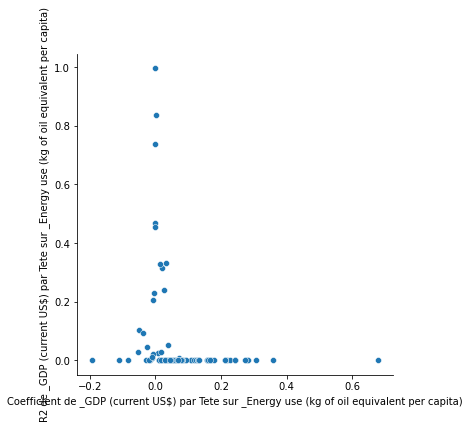

In [43]:
sns.relplot(data = data, x='Coefficient de _GDP (current US$) par Tete sur _Energy use (kg of oil equivalent per capita)' ,
            y = 'R2 de _GDP (current US$) par Tete sur _Energy use (kg of oil equivalent per capita)')

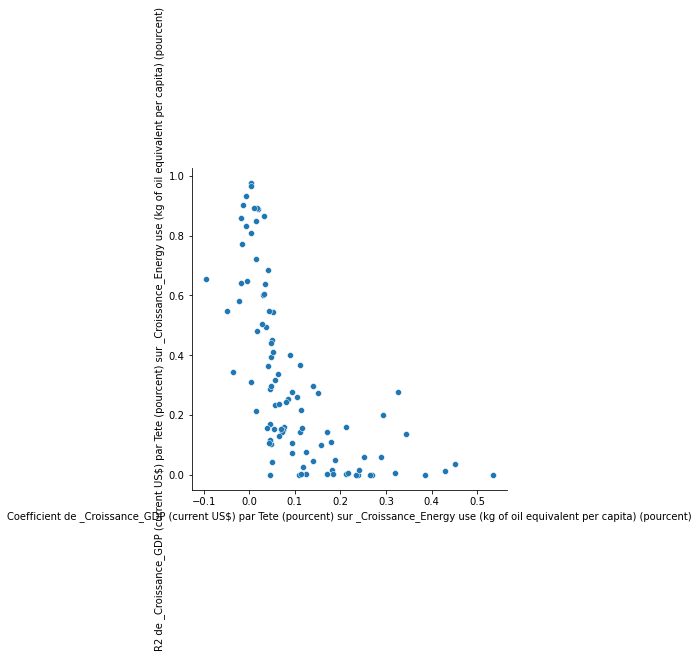

In [44]:
sns.relplot(data = data, x='Coefficient de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Energy use (kg of oil equivalent per capita) (pourcent)', 
            y = 'R2 de _Croissance_GDP (current US$) par Tete (pourcent) sur _Croissance_Energy use (kg of oil equivalent per capita) (pourcent)')

In [54]:
data2 = get_coeff(dic['pib'], dic['ges'])
data2

,Coefficient de _GDP (current US$) sur _Émissions totales de GES (kt d’équivalent CO2),R2 de _GDP (current US$) sur _Émissions totales de GES (kt d’équivalent CO2)
AGO,-2.577127e-08,0.018065
ALB,-3.120555e-08,0.003241
ARE,4.438433e-07,0.917791
ARG,2.982657e-07,0.509120
ARM,2.204460e-07,0.022384
...,...,...
VEN,2.433434e-07,0.457883
VNM,1.572593e-06,0.825736
VUT,1.101689e-07,0.316413
WSM,1.325549e-07,0.731437


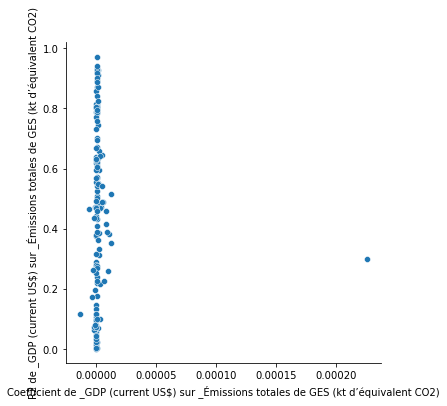

In [55]:
sns.relplot(data = data2, x='Coefficient de _GDP (current US$) sur _Émissions totales de GES (kt d’équivalent CO2)', 
            y = 'R2 de _GDP (current US$) sur _Émissions totales de GES (kt d’équivalent CO2)')

In [65]:
data = get_coeff(dic['pib_hab'], dic['ges_hab'])

data = data.merge(get_coeff(dic['pib'], dic['ges']), how = 'outer', left_index = True, right_index = True)
data.head()

,Coefficient de _GDP (current US$) par Tete sur _Émissions totales de GES (kt d’équivalent CO2) par Tete,R2 de _GDP (current US$) par Tete sur _Émissions totales de GES (kt d’équivalent CO2) par Tete,Coefficient de _GDP (current US$) sur _Émissions totales de GES (kt d’équivalent CO2),R2 de _GDP (current US$) sur _Émissions totales de GES (kt d’équivalent CO2)
AGO,-5.078478e-07,0.310325,-2.577127e-08,0.018065
ALB,2.821586e-08,0.002799,-3.120555e-08,0.003241
ARE,-2.950150e-07,0.052396,4.438433e-07,0.917791
ARG,6.733994e-08,0.107357,2.982657e-07,0.509120
ARM,3.391498e-07,0.083180,2.204460e-07,0.022384


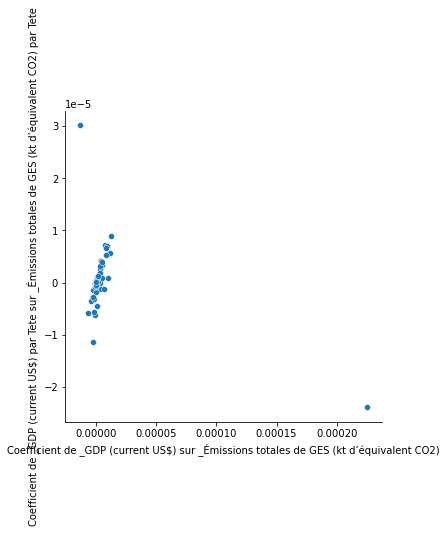

In [66]:
sns.relplot(data = data, x='Coefficient de _GDP (current US$) sur _Émissions totales de GES (kt d’équivalent CO2)', 
            y = 'Coefficient de _GDP (current US$) par Tete sur _Émissions totales de GES (kt d’équivalent CO2) par Tete')